In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
segmented_path = '/content/drive/Shared drives/ITK Ultrasound Consultation/Zoé_szakdolgozat/data/other_imaging_modalities/style_transfer_700_0.5M_outputs/masks'

ground_truth_masks_path = '/content/drive/Shared drives/ITK Ultrasound Consultation/Zoé_szakdolgozat/data/other_imaging_modalities/masks'

output_path = '/content/drive/Shared drives/ITK Ultrasound Consultation/Zoé_szakdolgozat/data/other_imaging_modalities/style_transfer_700_0.5M_outputs'

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
import os
import scipy.io
import pickle

In [ ]:
def Dice_coefficient(img_true, img_pred):
  intersection = np.sum(np.logical_and(img_true, img_pred))
  union = np.sum(img_true) + np.sum(img_pred)
  dice = 2.*intersection / union
  return dice

```
above:     255 0   0   (red)
dermis:    0   0   255 (blue)
epidermis: 0   255 0   (green)
lesion:    255 255 255 (white)
subcutis:  0   0   0   (black)
```



```
matches = re.finditer("_", gt_mask)
  matches_positions = [match.start() for match in matches]
  #idx = matches_positions[-2]
  print(matches_positions)
  #img_name = gt_mask[0:idx]
  #print(img_name)
```



In [ ]:
print(all_gt_mask_names)
print(all_segmented_mask_names)

['co_10_NEVUS.png', 'co_10_NEVUS_cropped.png', 'co_11_NEVUS.png', 'co_11_NEVUS_cropped.png', 'co_1_NEVUS.png', 'co_1_NEVUS_cropped.png', 'co_2_NEVUS.png', 'co_2_NEVUS_cropped.png', 'co_3_NEVUS.png', 'co_3_NEVUS_cropped.png', 'co_4_NEVUS.png', 'co_4_NEVUS_cropped.png', 'co_5_NEVUS.png', 'co_5_NEVUS_cropped.png', 'co_6_NEVUS.png', 'co_6_NEVUS_cropped.png', 'co_7_NEVUS.png', 'co_7_NEVUS_cropped.png', 'co_8_NEVUS.png', 'co_8_NEVUS_cropped.png', 'co_9_NEVUS.png', 'co_9_NEVUS_cropped.png', 'dr_1_UNKNOWN.png', 'dr_1_UNKNOWN_cropped.png', 'dr_2_UNKNOWN.png', 'dr_2_UNKNOWN_cropped.png', 'dr_3_UNKNOWN.png', 'dr_3_UNKNOWN_cropped.png', 'dr_4_UNKNOWN.png', 'dr_4_UNKNOWN_cropped.png', 'dr_5_UNKNOWN.png', 'dr_5_UNKNOWN_cropped.png', 'dr_6_UNKNOWN.png', 'dr_6_UNKNOWN_cropped.png', 'dr_7_UNKNOWN.png', 'dr_7_UNKNOWN_cropped.png', 'dr_8_UNKNOWN.png', 'dr_8_UNKNOWN_cropped.png', 'dr_9_UNKNOWN.png', 'dr_9_UNKNOWN_cropped.png', 'ha_13_BCC.png', 'ha_13_BCC_dark.png', 'ha_15_BCC.png', 'ha_15_BCC_dark.png', '

#one image

1000_co_1_NEVUS


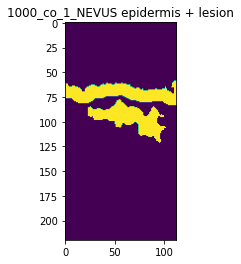

creating directory:/content/drive/Shared drives/ITK Ultrasound Consultation/Zoé_szakdolgozat/co_1_NEVUS_experiments/outputs/dice scores
100_co_1_NEVUS


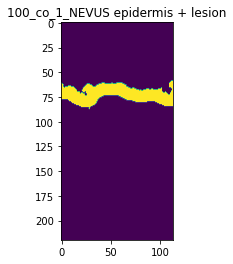

150_co_1_NEVUS


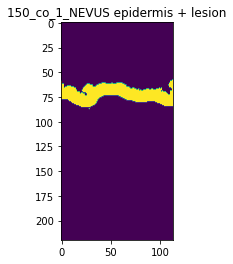

200_co_1_NEVUS


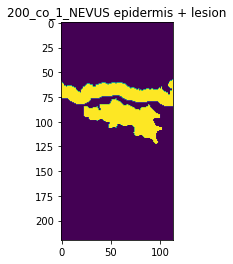

250_co_1_NEVUS


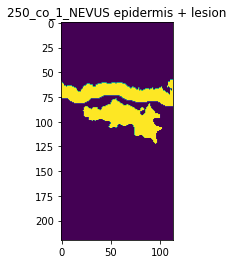

300_co_1_NEVUS


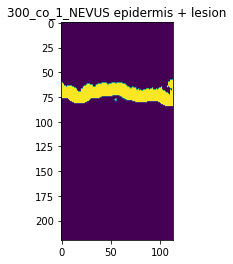

350_co_1_NEVUS


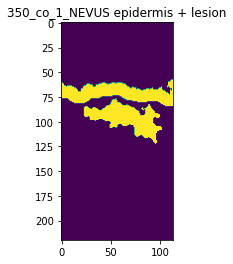

400_co_1_NEVUS


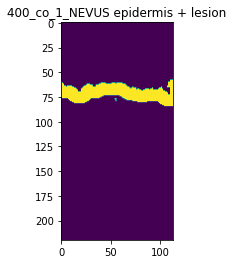

450_co_1_NEVUS


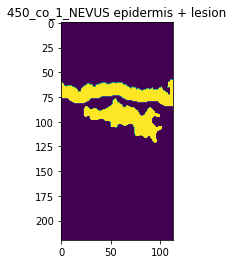

500_co_1_NEVUS


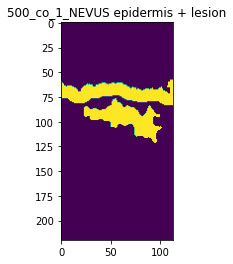

550_co_1_NEVUS


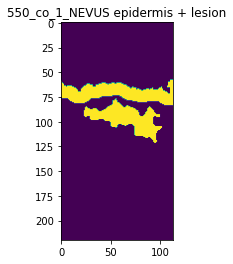

600_co_1_NEVUS


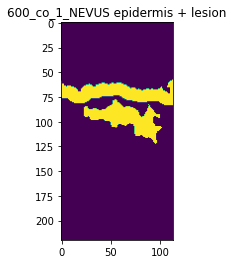

650_co_1_NEVUS


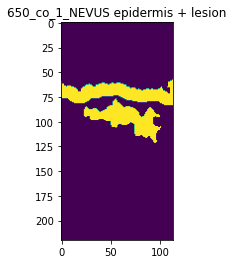

700_co_1_NEVUS


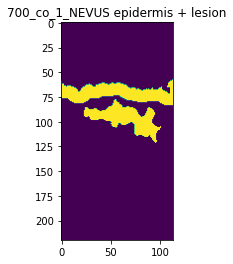

750_co_1_NEVUS


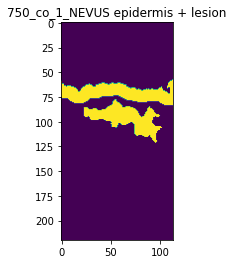

800_co_1_NEVUS


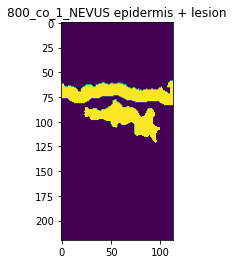

850_co_1_NEVUS


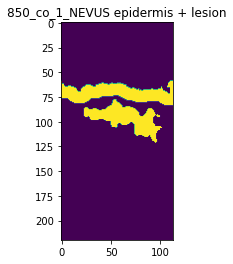

900_co_1_NEVUS


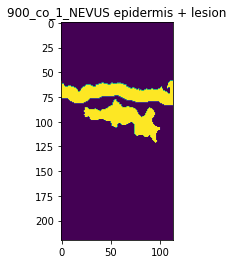

950_co_1_NEVUS


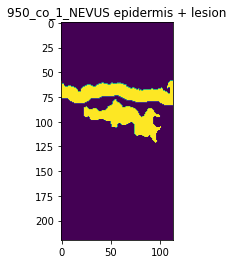

In [ ]:
gt_mask_name = 'co_1_NEVUS_cropped.png'
classes = ['above', 'dermis', 'epidermis', 'lesion', 'skin']
values = [[255,0,0], [0,0,255], [0,255,0], [255,255,255], [0,0,0]]
len_classes = len(classes)
all_segmented_mask_names = os.listdir(segmented_path)
all_segmented_mask_names.sort()
num_of_images = int(len(all_segmented_mask_names)/5)
#print(num_of_images)
i=0

#img_name = gt_mask_name[0:-4]
#len_img_name = len(img_name)
#read the gt mask
gt_mask_np =  cv2.imread(os.path.join(ground_truth_masks_path, gt_mask_name))
gt_mask_np = cv2.cvtColor(gt_mask_np, cv2.COLOR_BGR2RGB)

rows, cols, _ = gt_mask_np.shape

#get the 5 segmented binary mask filenames
#segmented_mask_names = all_segmented_mask_names[i:i+len_classes]
# ha az eleje megegyezik, és utána az jön, hogy 'mask'
# ez így csúnya, de egyelőre nincs más ötletem
#segmented_mask_names = [sm for sm in all_segmented_mask_names if (sm[len_img_name+1:len_img_name+5]=='mask' 
#                                                                  and sm[0:len_img_name]==img_name)]

for img_num in range(num_of_images):

  segmented_masks = np.zeros((rows, cols, len_classes))
  gt_masks = np.zeros((rows, cols, len_classes))
  #idx = img_num*len_classes
  idx = all_segmented_mask_names[i].find('_mask')
  img_name = all_segmented_mask_names[i][0:idx]
  print(img_name)
  segmented_mask_names = all_segmented_mask_names[i:i+len_classes]
  segmented_mask_names.sort()
  i+=len_classes
  for j in range(len_classes-1):
    #load the segmented mask
    segmented_mask_file = open(os.path.join(segmented_path, segmented_mask_names[j]), 'rb')
    #print(segmented_mask_names[j])
    segmented_masks[:,:,j] = pickle.load(segmented_mask_file)
    segmented_mask_file.close()
    
    r,g,b = values[j]
    #make a logical gt mask
    for x in range(rows):
      for y in range(cols):
        gt_masks[x,y,j] = np.all(gt_mask_np[x,y,:]==[r,g,b])
  #skin mask is the inverted above skin mask
  gt_masks[:,:,4] = np.logical_not(gt_masks[:,:,0])
  segmented_masks[:,:,4] = np.logical_not(segmented_masks[:,:,0])
  plt.figure()
  plt.imshow(segmented_masks[:,:,2]+segmented_masks[:,:,3])
  plt.title(img_name+' '+classes[2]+' + '+classes[3])
  plt.show()
  #dice score
  if not os.path.exists(os.path.join(output_path,'dice scores')):
    os.chdir(output_path)
    os.mkdir('dice scores')
    print('creating directory:' + output_path + '/dice scores')
  
  with open(os.path.join(output_path,'dice scores',img_name)+'.txt', 'w') as f:
    sum =0.0
    for k in range(len_classes):
      d = Dice_coefficient(gt_masks[:,:,k], segmented_masks[:,:,k])
      sum += d
      f.write(classes[k] + ' ' + str(d) + '\n')
    mean_d = sum/len_classes
    f.write('Mean ' + str(mean_d) + '\n')
  

In [ ]:
print(img_name)

co_10_NEVUS


#all images

In [ ]:
style_transfer = 1

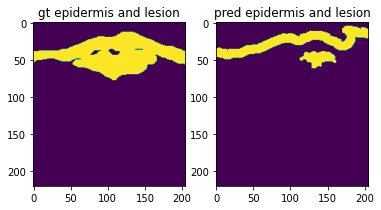

co_10_NEVUS_cropped done


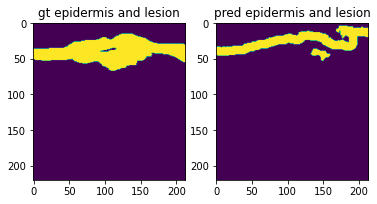

co_11_NEVUS_cropped done


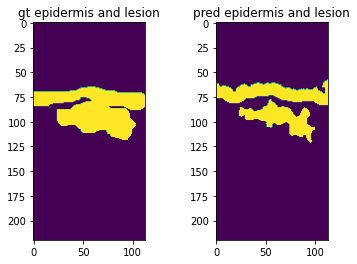

co_1_NEVUS_cropped done


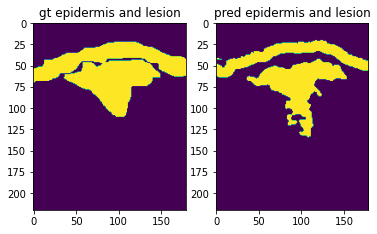

co_2_NEVUS_cropped done


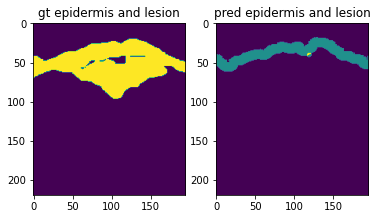

co_3_NEVUS_cropped done


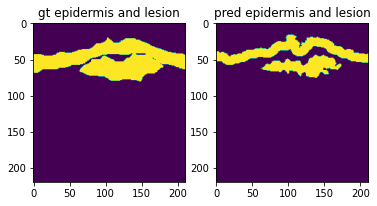

co_4_NEVUS_cropped done


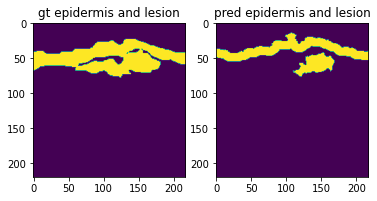

co_5_NEVUS_cropped done


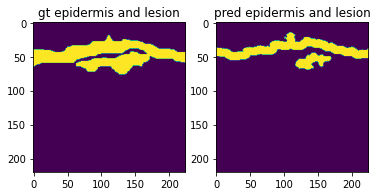

co_6_NEVUS_cropped done


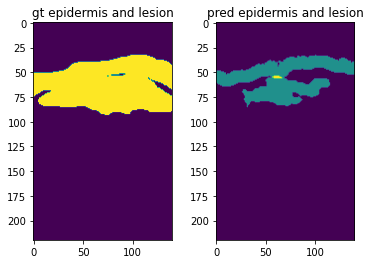

co_7_NEVUS_cropped done


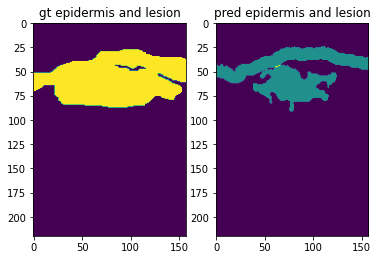

co_8_NEVUS_cropped done


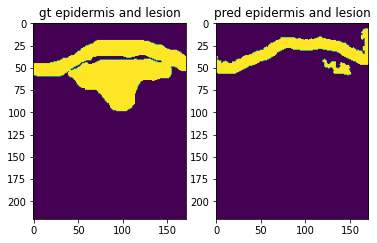

co_9_NEVUS_cropped done


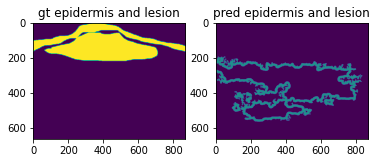

dr_1_UNKNOWN_cropped done


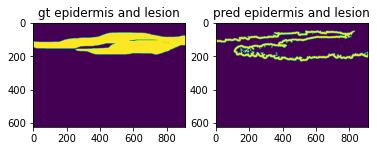

dr_2_UNKNOWN_cropped done


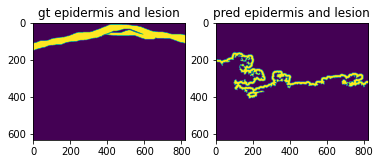

dr_3_UNKNOWN_cropped done


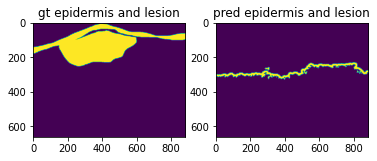

dr_4_UNKNOWN_cropped done


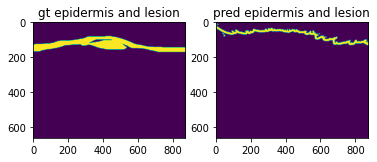

dr_5_UNKNOWN_cropped done


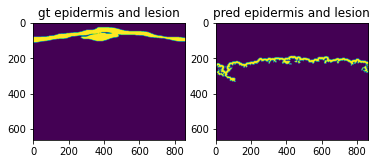

dr_6_UNKNOWN_cropped done


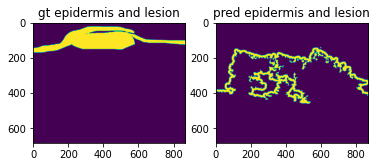

dr_7_UNKNOWN_cropped done


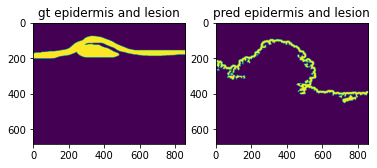

dr_8_UNKNOWN_cropped done


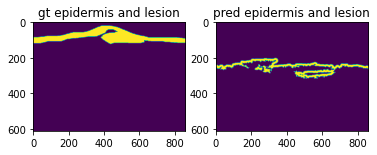

dr_9_UNKNOWN_cropped done


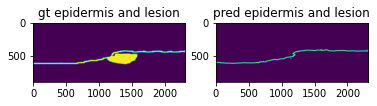

ha_13_BCC done


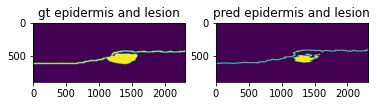

ha_13_BCC_dark done


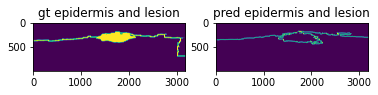

ha_15_BCC done


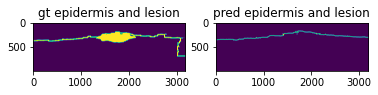

ha_15_BCC_dark done


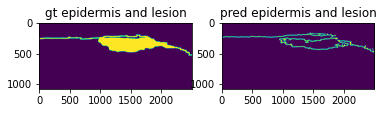

ha_18_BCC done


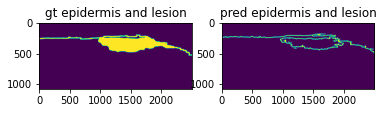

ha_18_BCC_dark done


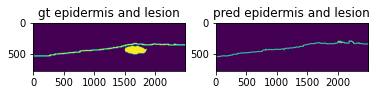

ha_1_NEVUS done


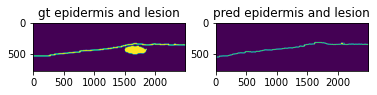

ha_1_NEVUS_dark done


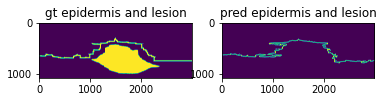

ha_23_MELA done


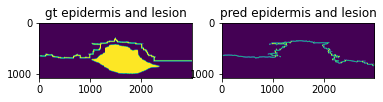

ha_23_MELA_dark done


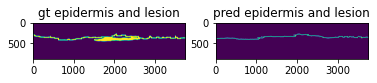

ha_24_MELA done


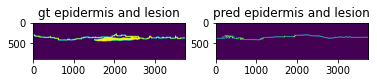

ha_24_MELA_dark done


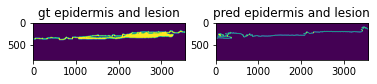

ha_26_MELA done


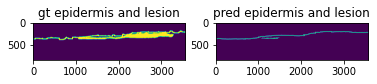

ha_26_MELA_dark done
segmentation failed for ha_28_MELA


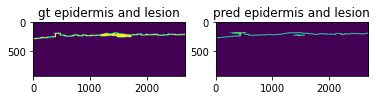

ha_28_MELA_dark done


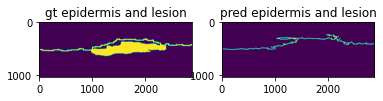

ha_3_NEVUS done


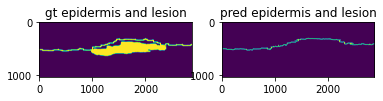

ha_3_NEVUS_dark done


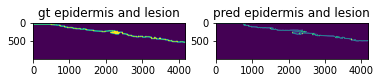

ha_5_NEVUS done


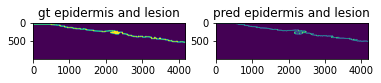

ha_5_NEVUS_dark done
segmentation failed for ha_6_NEVUS
segmentation failed for ha_6_NEVUS_dark
segmentation failed for ss_10_UNKNOWN
segmentation failed for ss_11_UNKNOWN


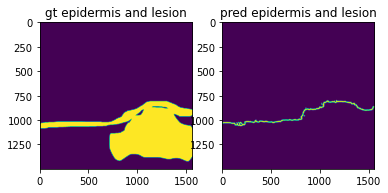

ss_12_UNKNOWN done


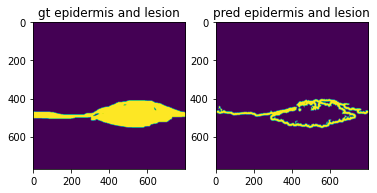

ss_1_UNKNOWN done


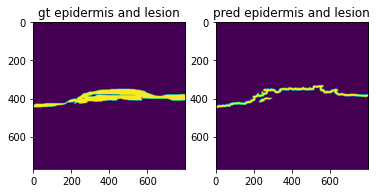

ss_2_UNKNOWN done


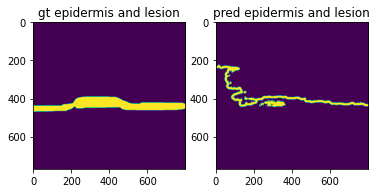

ss_3_UNKNOWN done


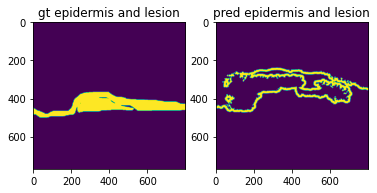

ss_4_UNKNOWN done


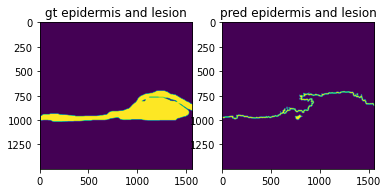

ss_5_UNKNOWN done


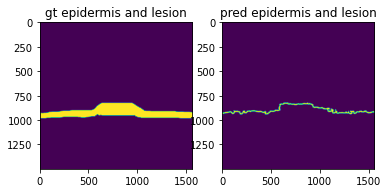

ss_6_UNKNOWN done


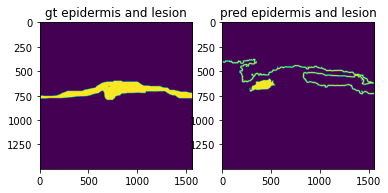

ss_7_UNKNOWN done


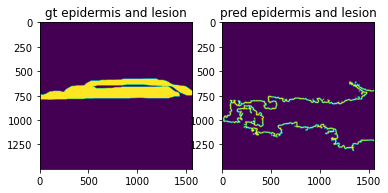

ss_8_UNKNOWN done


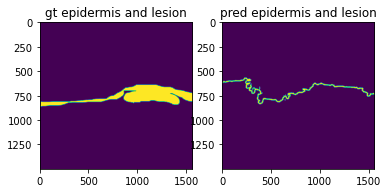

ss_9_UNKNOWN done


In [ ]:
"""
classes = {'above': [255,0,0], 
           'dermis': [0,0,255], 
           'epidermis':[0,255,0], 
           'lesion': [255,255,255]
           'subcutis': [0,0,0]}
"""

#above, dermis, epidermis, lesion, subcutis
classes = ['above', 'dermis', 'epidermis', 'lesion', 'skin']
values = [[255,0,0], [0,0,255], [0,255,0], [255,255,255], [0,0,0]]
len_classes = len(classes)

all_gt_mask_names = os.listdir(ground_truth_masks_path)
all_gt_mask_names.sort()
all_segmented_mask_names = os.listdir(segmented_path)
all_segmented_mask_names.sort()


i = 0

#iterate through all ground truth masks
for gt_mask_name in all_gt_mask_names:
  if style_transfer and gt_mask_name.startswith('hi_'):
    continue
  if (gt_mask_name.startswith('co') or gt_mask_name.startswith('dr')) and not gt_mask_name.endswith('cropped.png'):
    continue
  img_name = gt_mask_name[0:-4]
  len_img_name = len(img_name)
  #read the gt mask
  gt_mask_np =  cv2.imread(os.path.join(ground_truth_masks_path, gt_mask_name))
  gt_mask_np = cv2.cvtColor(gt_mask_np, cv2.COLOR_BGR2RGB)
  
  rows, cols, _ = gt_mask_np.shape
  
  #get the 5 segmented binary mask filenames
  #segmented_mask_names = all_segmented_mask_names[i:i+len_classes]
  # ha az eleje megegyezik, és utána az jön, hogy 'mask'
  # ez így csúnya, de egyelőre nincs más ötletem
  #segmented_mask_names = [sm for sm in all_segmented_mask_names if (sm[len_img_name+1:len_img_name+5]=='mask' 
  #  and sm[0:len_img_name]==img_name)]
  segmented_mask_names = [sm for sm in all_segmented_mask_names 
            if (sm[len_img_name+1:len_img_name+5]!='dark') and sm[0:len_img_name]==img_name]
  i+=len_classes
  if len(segmented_mask_names)==0:
    print('segmentation failed for', img_name)
    continue
  #print(img_name)
  #print(segmented_mask_names,'\n')
  
  segmented_masks = np.zeros((rows, cols, len_classes))
  gt_masks = np.zeros((rows, cols, len_classes))
  
  for j in range(len_classes-1):
    #load the segmented mask
    segmented_mask_file = open(os.path.join(segmented_path, segmented_mask_names[j]), 'rb')
    segmented_masks[:,:,j] = pickle.load(segmented_mask_file)
    segmented_mask_file.close()
    
    r,g,b = values[j]
    #make a logical gt mask
    for x in range(rows):
      for y in range(cols):
        gt_masks[x,y,j] = np.all(gt_mask_np[x,y,:]==[r,g,b])
  #skin mask is the inverted above skin mask
  gt_masks[:,:,4] = np.logical_not(gt_masks[:,:,0])
  segmented_masks[:,:,4] = np.logical_not(segmented_masks[:,:,0])
  plt.figure()
  plt.subplot(1,2,1)
  plt.imshow(gt_masks[:,:,2]+gt_masks[:,:,3])
  plt.title('gt epidermis and lesion')
  plt.subplot(1,2,2)
  plt.imshow(segmented_masks[:,:,2]+segmented_masks[:,:,3])
  plt.title('pred epidermis and lesion')
  plt.show()
  #dice score
  if not os.path.exists(os.path.join(output_path,'dice scores')):
    os.chdir(output_path)
    os.mkdir('dice scores')
    print('creating directory:' + output_path + '/dice scores')
  with open(os.path.join(output_path,'dice scores',img_name)+'.txt', 'w') as f:
    sum =0.0
    for k in range(len_classes):
      d = Dice_coefficient(gt_masks[:,:,k], segmented_masks[:,:,k])
      sum += d
      f.write(classes[k] + ' ' + str(d) + '\n')
    mean_d = sum/len_classes
    f.write('Mean ' + str(mean_d) + '\n')
  print(img_name, 'done')
  

# txt to csv

In [ ]:
import csv
import os
input_dir = '/content/drive/Shared drives/ITK Ultrasound Consultation/Zoé_szakdolgozat/data/other_imaging_modalities/style_transfer_700_0.5M_outputs/dice scores'
txt_files = os.listdir(input_dir)
txt_files.sort()
with open(input_dir+'/dice_scores.csv', 'w', newline='') as csvfile:
  fieldnames = ['filename', 'above', 'epidermis', 'dermis', 'lesion', 'skin', 'mean']
  writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
  writer.writeheader()
  for txt_file in txt_files:
    if txt_file.endswith('.txt'):
      f = open(input_dir+'/'+txt_file, 'r')
      lines = f.readlines()
      f.close()
      numbers = []
      for line in lines:
        words = line.split()
        numbers.append(float(words[1]))
      writer.writerow({'filename':txt_file[0:-4], 'above':numbers[0], 'epidermis':numbers[1], 'dermis':numbers[2],
                      'lesion':numbers[3], 'skin':numbers[4], 'mean':numbers[5]})
      print(txt_file, 'done')
    

co_10_NEVUS_cropped.txt done
co_11_NEVUS_cropped.txt done
co_1_NEVUS_cropped.txt done
co_2_NEVUS_cropped.txt done
co_3_NEVUS_cropped.txt done
co_4_NEVUS_cropped.txt done
co_5_NEVUS_cropped.txt done
co_6_NEVUS_cropped.txt done
co_7_NEVUS_cropped.txt done
co_8_NEVUS_cropped.txt done
co_9_NEVUS_cropped.txt done
dr_1_UNKNOWN_cropped.txt done
dr_2_UNKNOWN_cropped.txt done
dr_3_UNKNOWN_cropped.txt done
dr_4_UNKNOWN_cropped.txt done
dr_5_UNKNOWN_cropped.txt done
dr_6_UNKNOWN_cropped.txt done
dr_7_UNKNOWN_cropped.txt done
dr_8_UNKNOWN_cropped.txt done
dr_9_UNKNOWN_cropped.txt done
ha_13_BCC.txt done
ha_13_BCC_dark.txt done
ha_15_BCC.txt done
ha_15_BCC_dark.txt done
ha_18_BCC.txt done
ha_18_BCC_dark.txt done
ha_1_NEVUS.txt done
ha_1_NEVUS_dark.txt done
ha_23_MELA.txt done
ha_23_MELA_dark.txt done
ha_24_MELA.txt done
ha_24_MELA_dark.txt done
ha_26_MELA.txt done
ha_26_MELA_dark.txt done
ha_28_MELA_dark.txt done
ha_3_NEVUS.txt done
ha_3_NEVUS_dark.txt done
ha_5_NEVUS.txt done
ha_5_NEVUS_dark.txt d